In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
# Load the dataset
data_path = r'C:\Users\xiaoy\OneDrive\Desktop\Data Visualization\short-term-rental-registrations-data.csv'  # Update the path to your dataset if necessary
df = pd.read_csv(data_path)

# Display basic info about the dataset
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8709 entries, 0 to 8708
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   _id                           8709 non-null   int64  
 1   operator_registration_number  8709 non-null   object 
 2   address                       8709 non-null   object 
 3   unit                          4914 non-null   object 
 4   postal_code                   8709 non-null   object 
 5   property_type                 8709 non-null   object 
 6   ward_number                   8705 non-null   float64
 7   ward_name                     8705 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 544.4+ KB
None
       _id operator_registration_number                  address unit  \
0  3155964              STR-2211-JBBBHZ         137 Danforth Ave    4   
1  3155965              STR-2211-GLYVHT         34 Bellwoods Ave  NaN   
2  3155966      

In [53]:
# Check for missing values in the dataset
print("Missing Values in Each Column:")
print(df.isnull().sum())

Missing Values in Each Column:
_id                                0
operator_registration_number       0
address                            0
unit                            3795
postal_code                        0
property_type                      0
ward_number                        4
ward_name                          4
dtype: int64


In [54]:
# Dropping rows with missing values in critical columns
critical_columns = ['ward_number', 'ward_name']
df_cleaned = df.dropna(subset=critical_columns)

# Save the cleaned data to a new CSV file for Tableau
df_cleaned.to_csv('short-term-rentals-cleaned.csv', index=False)


In [55]:
# The output indicates that only the unit column has missing values (3,803 missing values): 3795 unit numbers, ward_number 4 and ward_name 4. All other columns are complete, with no missing data.
# Leave the Missing Values in unit: The unit is not critical for my analysis, leaving the missing values as is. The absence of a unit number will not affect visualizations about property type or ward distribution.
# Drop rows with missing values in columns (ward_number and ward_name).

C:\Users\xiaoy\AppData\Local\Temp\ipykernel_13052\1772491567.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


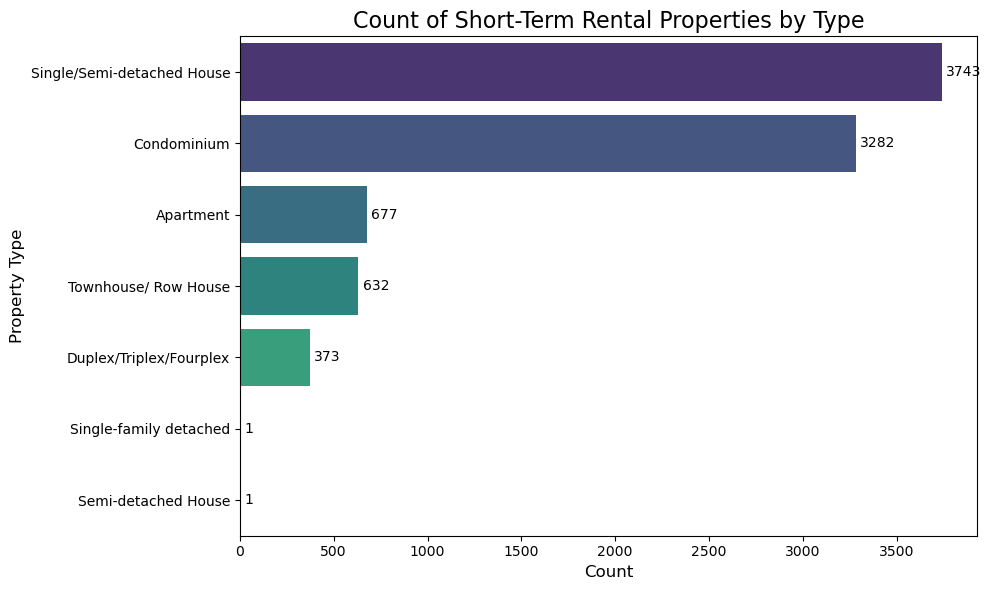

In [56]:
# Visualization 1: Count of properties by property type
plt.figure(figsize=(10, 6))
ax = sns.countplot(
    y='property_type', 
    data=df, 
    order=df['property_type'].value_counts().index, 
    palette='viridis'
)

# Add data labels
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10, padding=3)

# Add title and labels
plt.title('Count of Short-Term Rental Properties by Type', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Property Type', fontsize=12)
plt.tight_layout()
plt.show()


C:\Users\xiaoy\AppData\Local\Temp\ipykernel_13052\2616788716.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


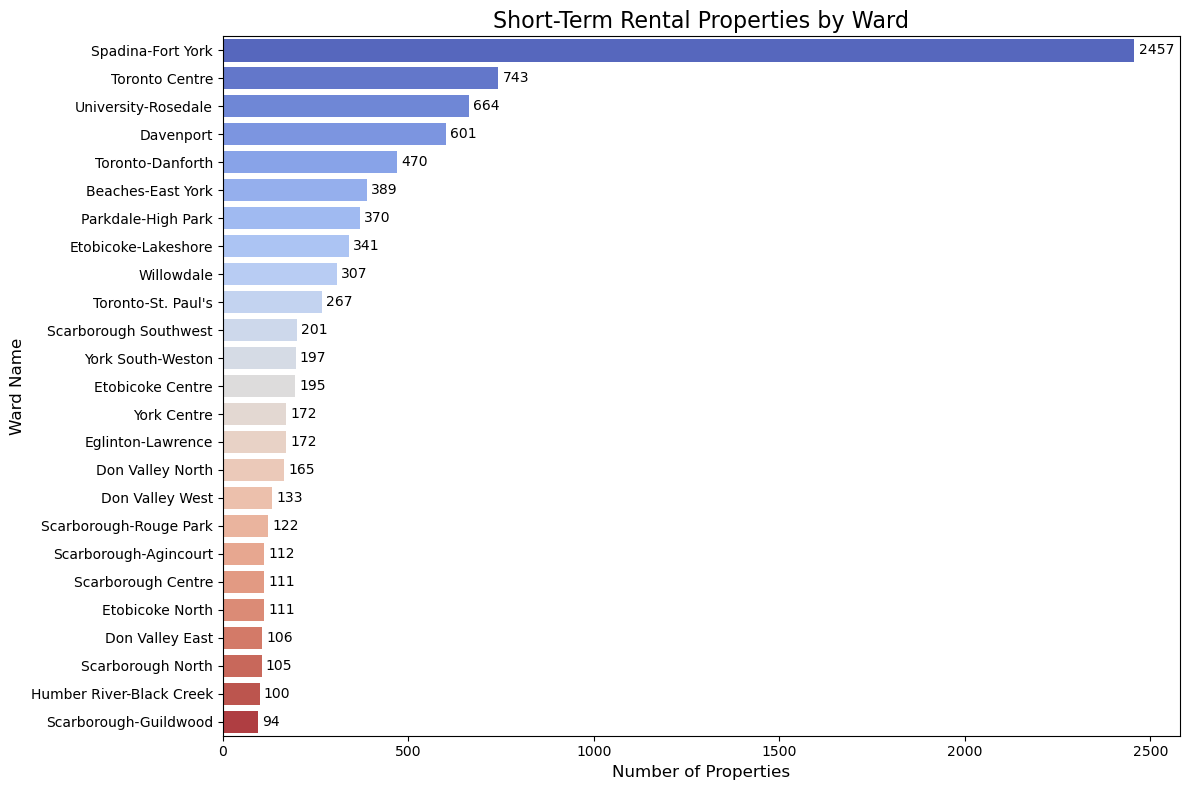

In [57]:
# Visualization 2: Distribution of properties by ward
plt.figure(figsize=(12, 8))

# Prepare data for the plot
ward_counts = df.groupby(['ward_number', 'ward_name'])['_id'].count().reset_index()
ward_counts.rename(columns={'_id': 'property_count'}, inplace=True)

# Create the barplot
ax = sns.barplot(
    y='ward_name', 
    x='property_count', 
    data=ward_counts, 
    palette='coolwarm',
    order=ward_counts.sort_values('property_count', ascending=False)['ward_name']
)

# Add data labels to the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10, padding=3)

# Add title and labels
plt.title('Short-Term Rental Properties by Ward', fontsize=16)
plt.xlabel('Number of Properties', fontsize=12)
plt.ylabel('Ward Name', fontsize=12)
plt.tight_layout()

plt.show()




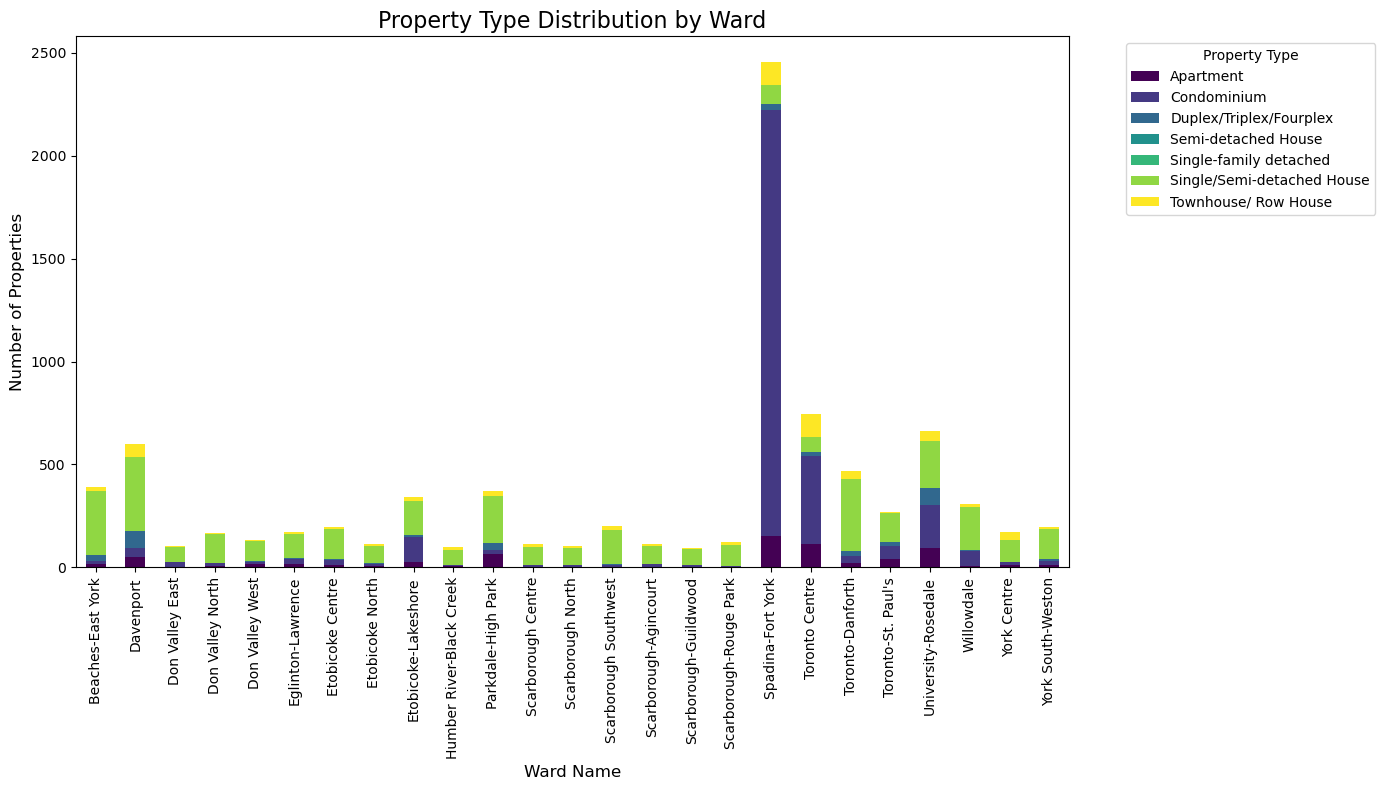

In [58]:
# Property Type Distribution by Ward (Stacked Bar Chart)
# The bar chart is created with the grouped data, showing the distribution of properties by ward.
# This section uses plt.subplots() with a single axis (ax1), plots the data as a stacked bar chart, and customizes the labels and title

import matplotlib.pyplot as plt

# Prepare the data
property_type_by_ward = df.groupby(['ward_name', 'property_type'])['_id'].count().unstack().fillna(0)

# Create the figure and axis for the bar chart
fig, ax1 = plt.subplots(figsize=(14, 8))

# Create the bar chart in the first subplot
property_type_by_ward.plot(kind='bar', stacked=True, ax=ax1, colormap='viridis')
ax1.set_title('Property Type Distribution by Ward', fontsize=16)
ax1.set_xlabel('Ward Name', fontsize=12)
ax1.set_ylabel('Number of Properties', fontsize=12)
ax1.legend(title='Property Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout for better spacing
plt.tight_layout()

# Show the bar chart
plt.show()







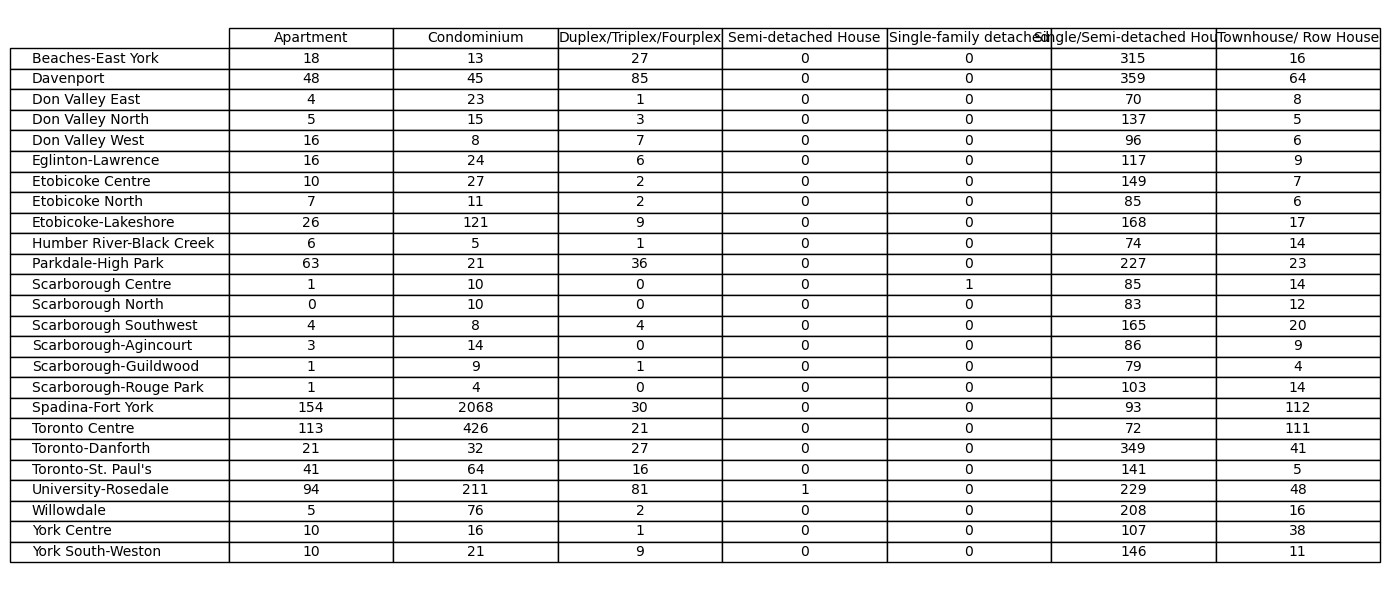

In [59]:
# Property Type Distribution by Ward (Table)
# This section creates a separate figure for the table that displays the count of properties by ward and property type.
# The axes are turned off using ax2.axis('off') so that only the table is visible.

import matplotlib.pyplot as plt

# Prepare the data for the table
property_type_by_ward = df.groupby(['ward_name', 'property_type'])['_id'].count().unstack().fillna(0)

# Create the figure and axis for the table
fig, ax2 = plt.subplots(figsize=(14, 6))

# Create the table in the second subplot
table_data = property_type_by_ward.astype(int)  # Ensure data is integer for display
table = ax2.table(
    cellText=table_data.values,
    rowLabels=table_data.index,
    colLabels=table_data.columns,
    cellLoc='center',
    loc='center'
)
table.auto_set_font_size(False)
table.set_fontsize(10)

# Remove axes to just show the table
ax2.axis('off')

# Adjust layout for the table
plt.tight_layout()

# Show the table
plt.show()


In [60]:
# Group the data by 'ward_name' and 'property_type' to count the properties
property_type_by_ward = df.groupby(['ward_name', 'property_type'])['_id'].count().unstack().fillna(0)

# Get the ward with the highest number of Condominium properties
condominium_ward = property_type_by_ward['Condominium'].idxmax()
condominium_count = property_type_by_ward['Condominium'].max()

# Get the ward with the highest number of Single Family Detached properties
single_family_ward = property_type_by_ward['Single/Semi-detached House'].idxmax()
single_family_count = property_type_by_ward['Single/Semi-detached House'].max()

# Output the results
print(f"Ward with highest Condominium properties: {condominium_ward} ({condominium_count} properties)")
print(f"Ward with highest Single Family Detached properties: {single_family_ward} ({single_family_count} properties)")

Ward with highest Condominium properties: Spadina-Fort York (2068.0 properties)
Ward with highest Single Family Detached properties: Davenport (359.0 properties)


In [61]:
# Display all unique property types
print(df['property_type'].unique())



['Apartment' 'Townhouse/ Row House' 'Condominium'
 'Single/Semi-detached House' 'Duplex/Triplex/Fourplex'
 'Single-family detached' 'Semi-detached House']
